In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"D:\Jupyter files 1\housing data (1).csv")

In [436]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


In [438]:
# Head of dataset 
data.head(3)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500


In [5]:
# Count rows and columns in the dataset 
print(f' Rows: {data.shape[0]}')
print(f' Columns: {data.shape[1]}')

 Rows: 1418
 Columns: 13


In [7]:
#Data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


## Descriptive analysis

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


*Inferences:* 
1) Overall quality/ build quality ranges on a scale of 1-10.
2) Properties ranges from year 1872 to 2010.
3) There could be outliers in TotalBsmtSF, GrLivArea and SalePrice.
4) Basement and garage area 0, shows that there are properties without basement or garage.
5) There are properties without bathrooms as well.

In [12]:
data.describe(include= object).T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


*Inference:* 
1) Most of teh properties have electrical work of type 'SBrkr' and have attached garage.

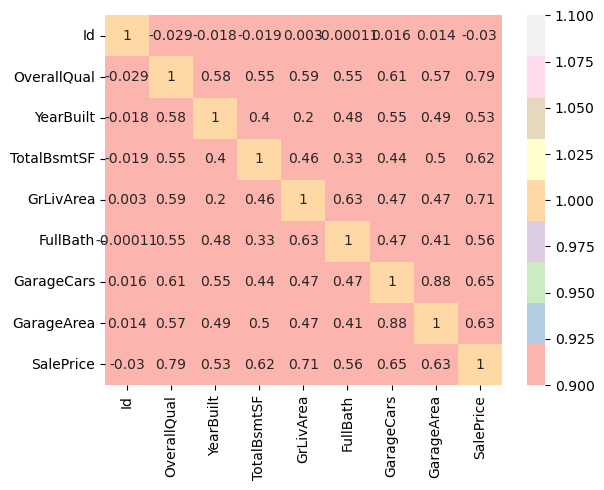

In [15]:
# Explore the correlation among numerical columns 

sns.heatmap(data.corr(numeric_only= True), vmin= 1, annot= True, cmap= 'Pastel1', linecolor= 'yellow')
plt.show()

*Inferences:* 
1) Sale price has the strongest correlation with OverllQual, DrLivArea, GarageCars, GarageArea and TotalBsmtSF in descending order.
2) Garage area and Garage car show the strongest correlation +0.88 in the entire dataset.
3) ID is redundant column, we can get rid of this. 

## Univariate Analysis 

In [156]:
# Seperate numeric columns and catagorical columns 

data.columns
num_cols= ['YearBuilt', 'TotalBsmtSF','GrLivArea','GarageArea', 'SalePrice']
cat_cols= ['OverallQual', 'Electrical', 'FullBath', 'GarageType', 'GarageCars', 'Fence', 'MiscFeature']

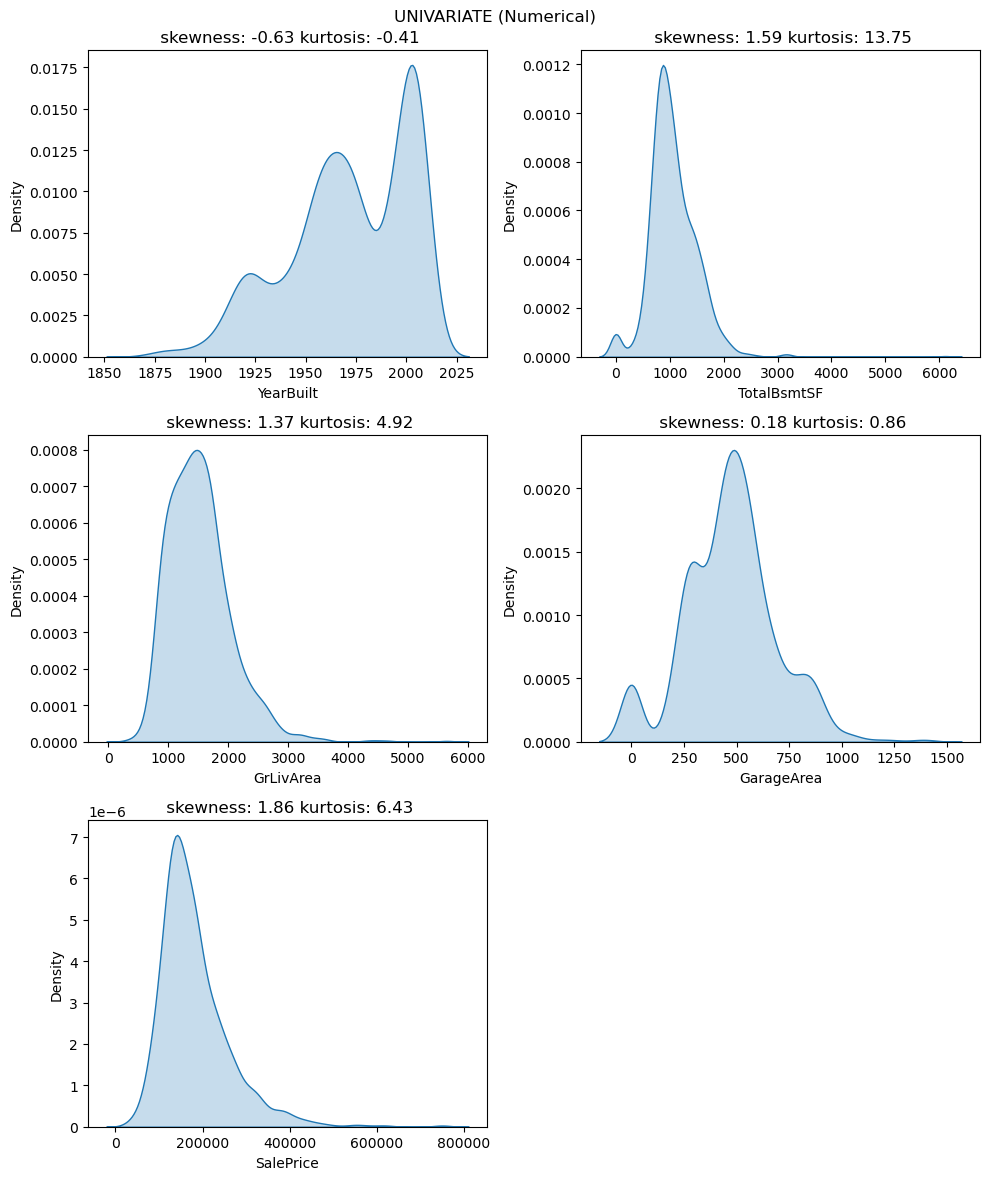

In [23]:
# Explore the numerical columns 

t= 1 
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE (Numerical)')
for i in num_cols:
    s,k= data[i].skew(), data[i].kurt()
    plt.subplot(3,2,t)
    sns.kdeplot(data= data, x= i, fill= True)
    plt.title(f' skewness: {round(s,2)} kurtosis: {round(k,2)}')
    t= t+1 

plt.tight_layout()
plt.show()

*Inferences:* 
1) Most graphs are right skewed except yearbuilt
2) Most of the houses have prices less than 35k
3) Most of the houses have area betweeen 250 and 750 sqft 

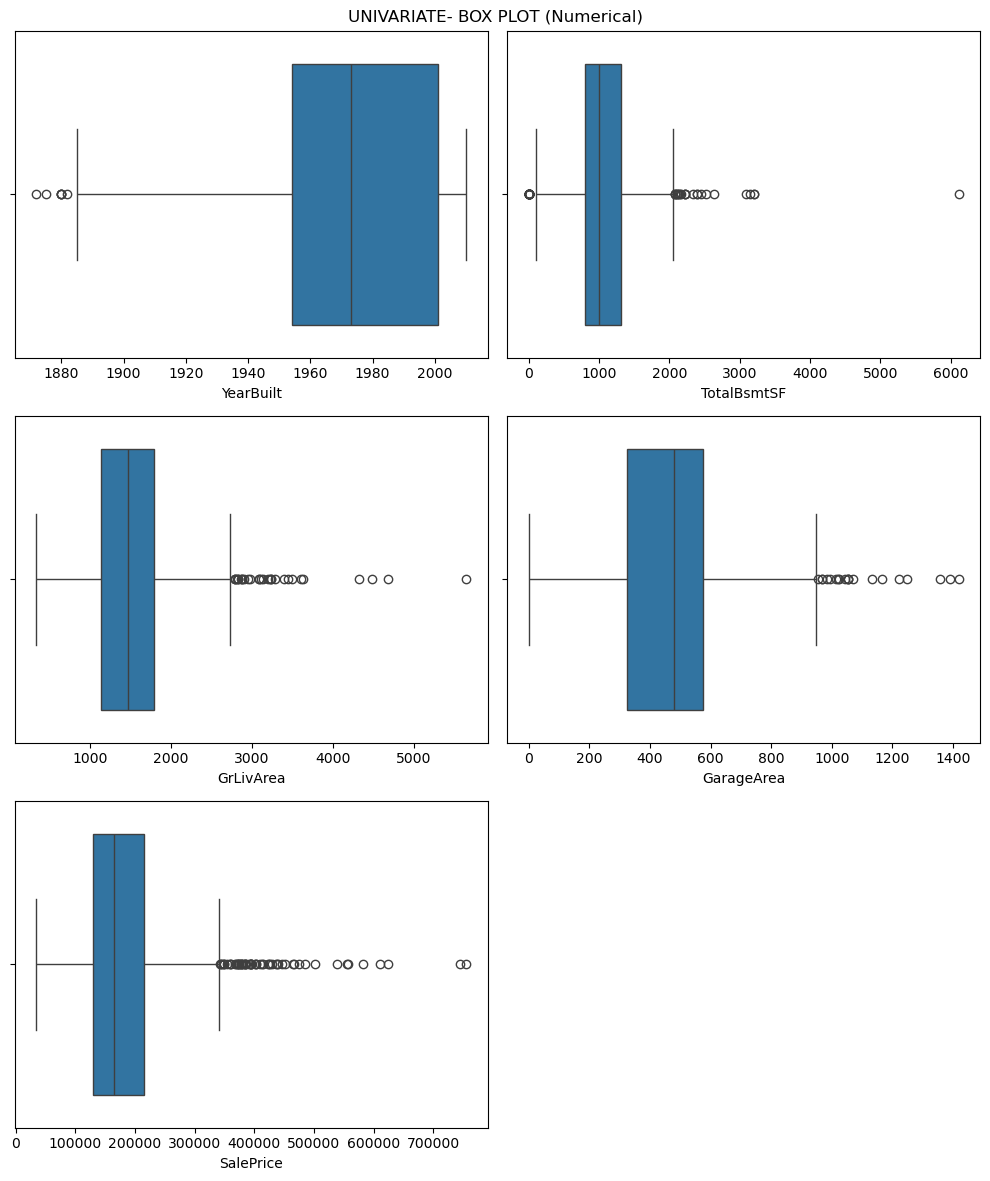

In [26]:
t= 1 
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE- BOX PLOT (Numerical)')
for i in num_cols:
    s,k= data[i].skew(), data[i].kurt()
    plt.subplot(3,2,t)
    sns.boxplot(data= data, x= i, fill= True)
    t= t+1 

plt.tight_layout()
plt.show()

*Inferences:* 
1) There are a lot of outliers in almost each graph but saleprice,garage area and garage area have some extreme outliers.


In [29]:
# Explore categorical columns 

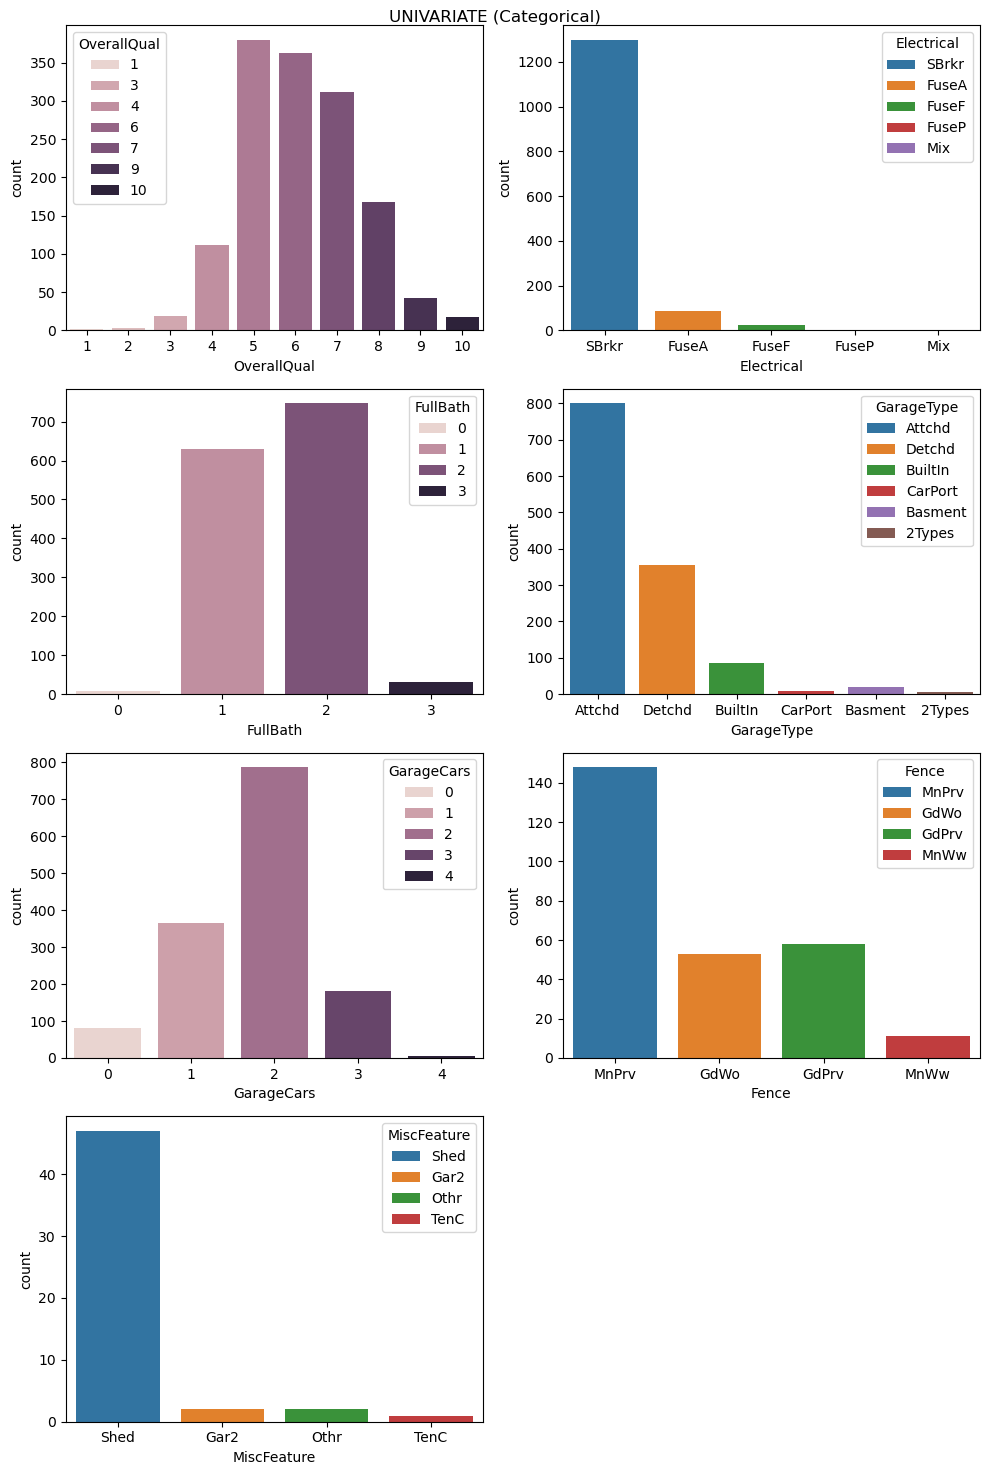

In [31]:
t= 1 
plt.figure(figsize=(10,15))
plt.suptitle('UNIVARIATE (Categorical)')
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data= data, x= i, hue= i)
    t= t+1 

plt.tight_layout()
plt.show()

## Bivariate analysis 

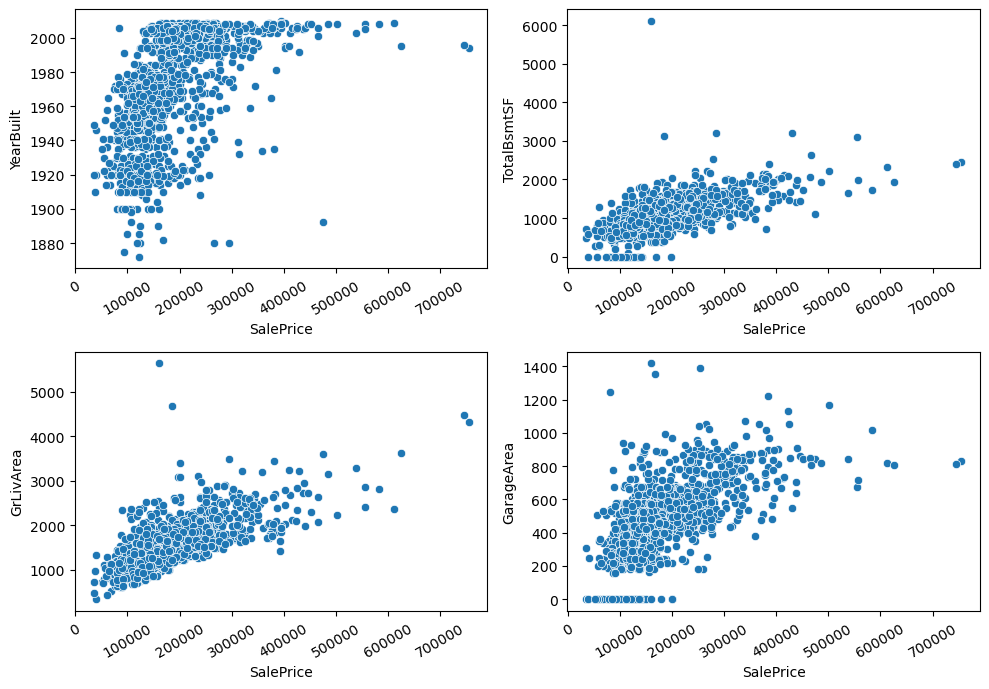

In [34]:
# Explore the relation numerical columns with salesprice

t= 1 
plt.figure(figsize= (10,7))
for i in num_cols: 
    if i!= 'SalePrice':
        plt.subplot(2,2,t)
        sns.scatterplot(data= data, x= 'SalePrice', y= i)
        plt.xticks(rotation=30)
        t= t+1 

plt.tight_layout()
plt.show()

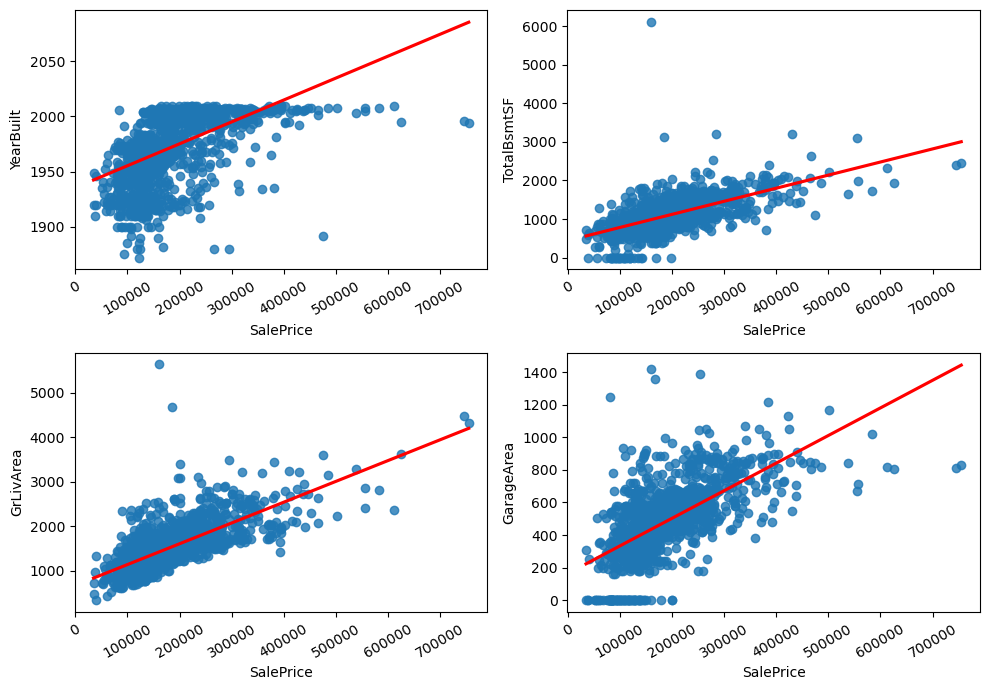

In [468]:
t= 1 
plt.figure(figsize= (10,7))
for i in num_cols: 
    if i!= 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(data= data, x= 'SalePrice', y= i, line_kws= {'color':'red'}, ci=0)
        plt.xticks(rotation=30)
        t= t+1 

plt.tight_layout()
plt.show()

*Inferences:* 
1) All the numeric columns have positive trend with sale price
2) There are some points which seems to be anomolies in the data. We will investigate thme further in outliers treatment 

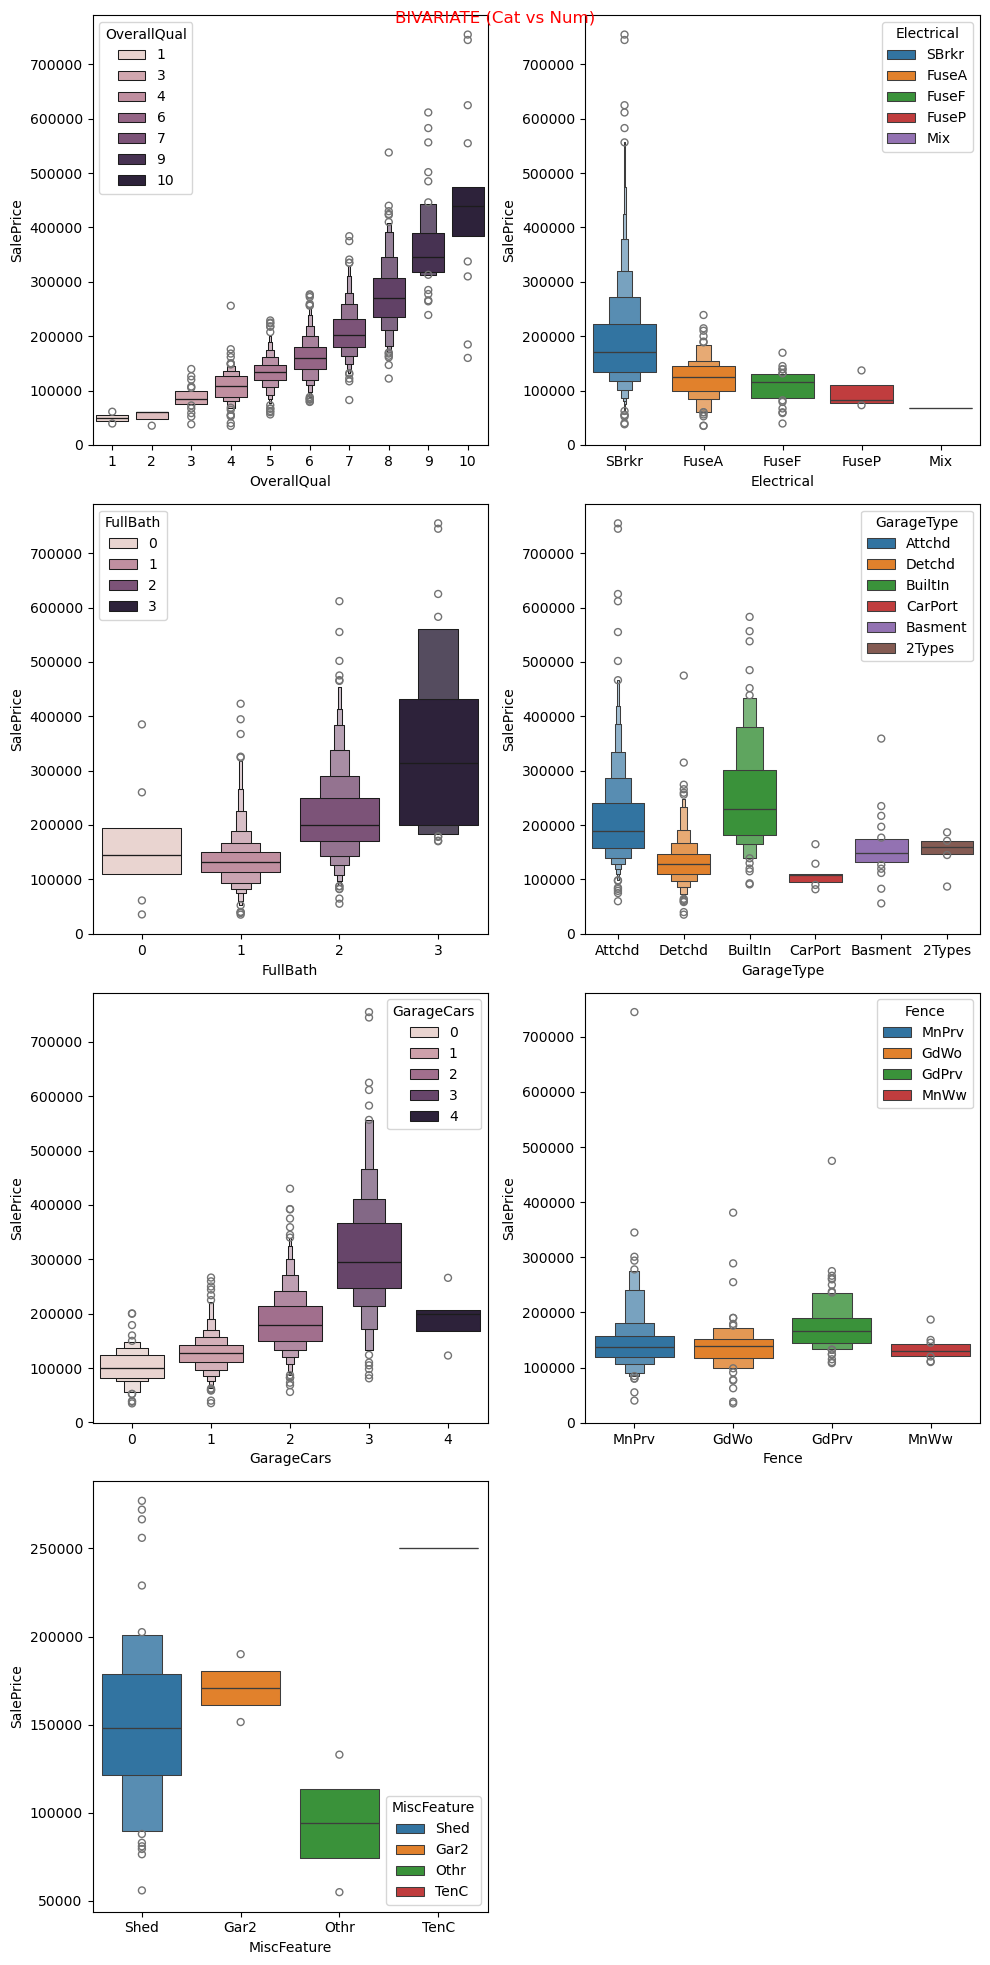

In [36]:
t= 1 
plt.figure(figsize=(10,20))
plt.suptitle('BIVARIATE (Cat vs Num)', color= 'red', size= 12)
for i in cat_cols: 
    plt.subplot(4,2,t)
    sns.boxenplot(data= data, x= i, y= 'SalePrice', hue= i)
    t= t+1 
plt.tight_layout()
plt.show()

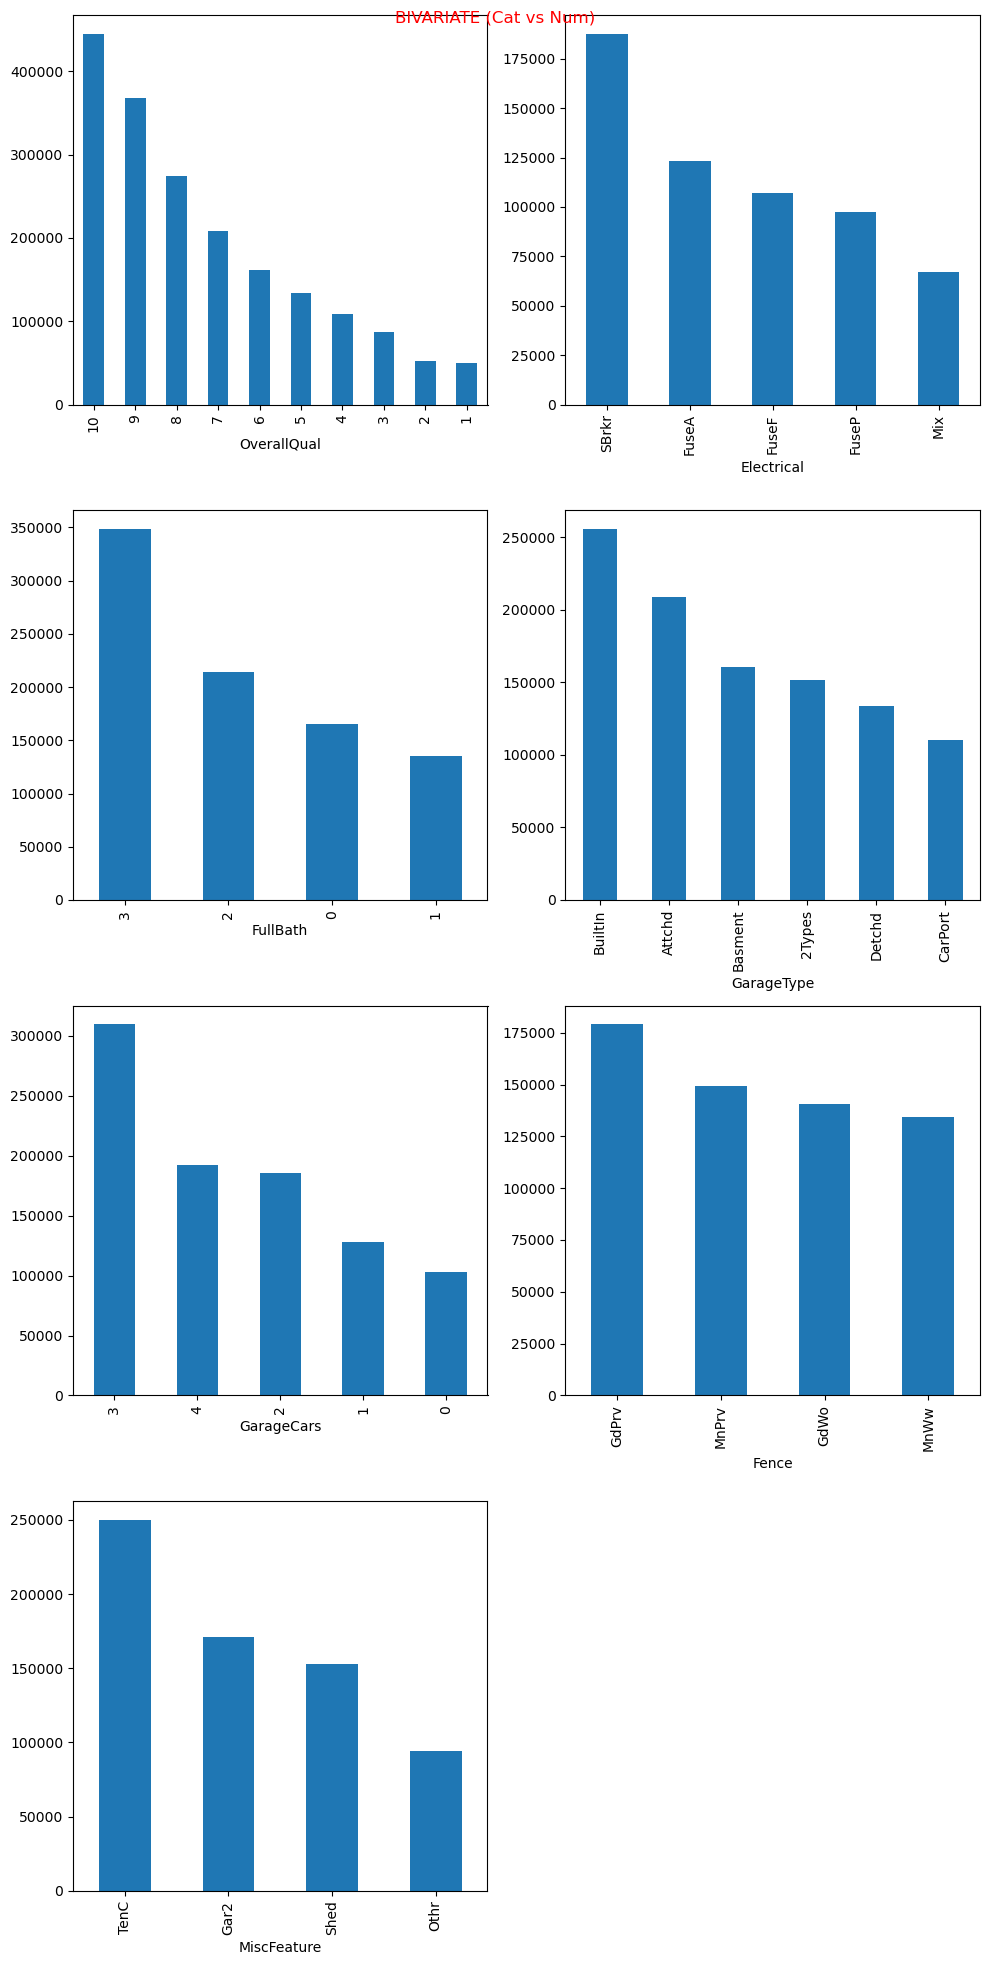

In [471]:
t= 1 
plt.figure(figsize=(10,20))
plt.suptitle('BIVARIATE (Cat vs Num)', color= 'red', size= 12)
for i in cat_cols: 
    plt.subplot(4,2,t)
    data.groupby(by= i)['SalePrice'].mean().sort_values(ascending= False).plot(kind= 'bar')
    t= t+1 
plt.tight_layout()
plt.show()

## Series Data

In [38]:
flight= sns.load_dataset('flights')

In [40]:
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


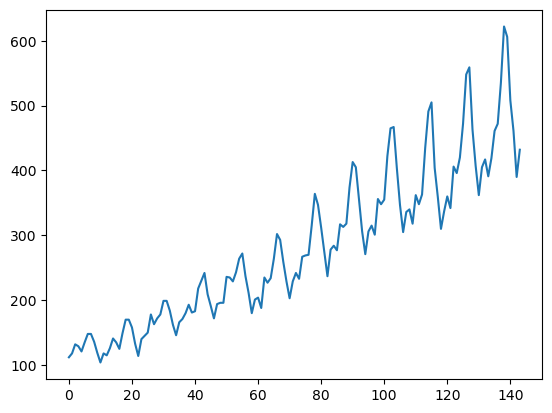

In [42]:
flight['passengers'].plot(kind= 'line')
plt.show()

In [44]:
new_index= flight['month'].astype('str')+ '-'+ flight['year'].astype('str')

In [46]:
new_index

0      Jan-1949
1      Feb-1949
2      Mar-1949
3      Apr-1949
4      May-1949
         ...   
139    Aug-1960
140    Sep-1960
141    Oct-1960
142    Nov-1960
143    Dec-1960
Length: 144, dtype: object

In [48]:
flight.set_index(new_index, inplace= True)

In [50]:
flight

,year,month,passengers
Jan-1949,1949,Jan,112
Feb-1949,1949,Feb,118
Mar-1949,1949,Mar,132
Apr-1949,1949,Apr,129
May-1949,1949,May,121
...,...,...,...
Aug-1960,1960,Aug,606
Sep-1960,1960,Sep,508
Oct-1960,1960,Oct,461
Nov-1960,1960,Nov,390


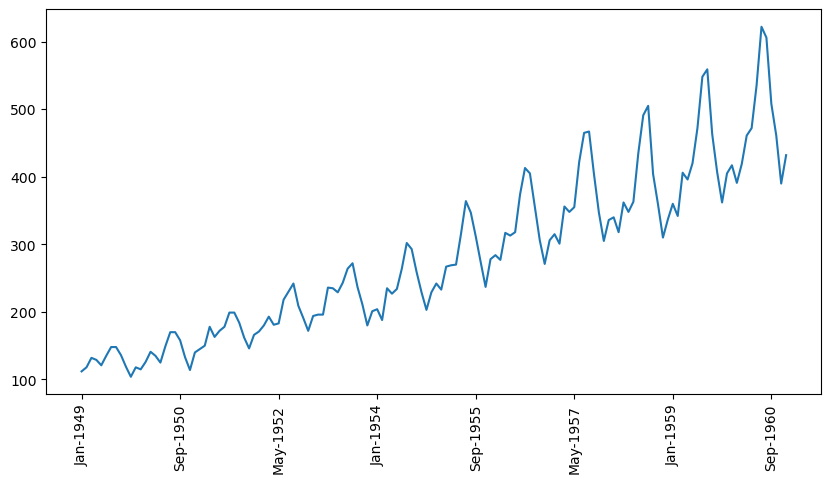

In [52]:
plt.figure(figsize=(10,5))
flight['passengers'].plot(kind= 'line')
plt.xticks(rotation= 90)
plt.show()

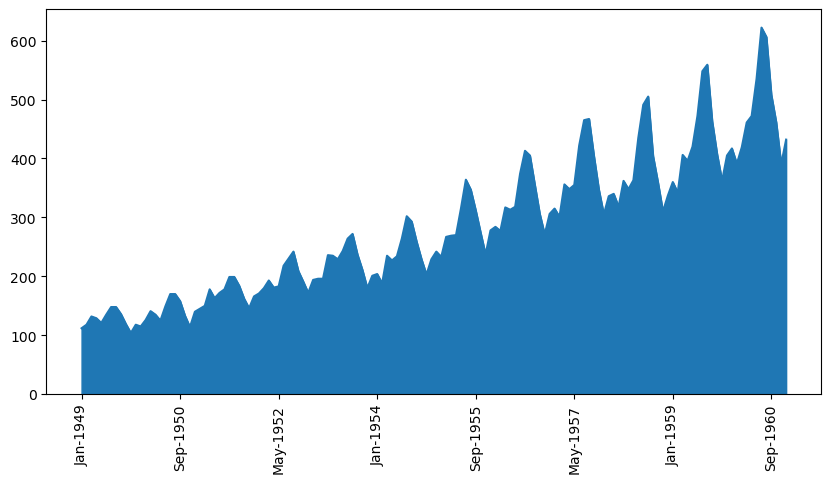

In [482]:
plt.figure(figsize=(10,5))
flight['passengers'].plot(kind= 'area')
plt.xticks(rotation= 90)
plt.show()

# Data preprocessing

## Missing value treatment 

In [54]:
# Identify missing values 
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending= False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

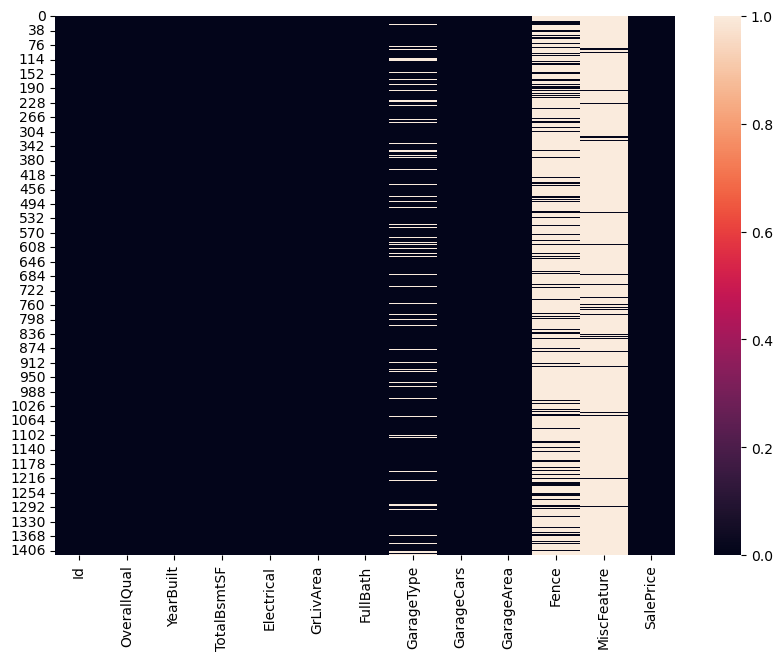

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull())
plt.show()

Treating missing values 
* Clossest fit
* Central value imputation
* Deletion 

In [68]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [64]:
data.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        0
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [62]:
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace= True)  #Removed the missing values in electrical 

In [66]:
# Missing values in garage type
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [70]:
data['GarageType']= np.where((data['GarageArea']==0)&(data['GarageCars']==0),
         'NoGarage', data['GarageType'])

In [72]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,48,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1264,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,1318,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,1358,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [74]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [76]:
data['GarageType']= np.where((data['GarageType'].isnull())&(data['GarageCars']==1),
         'Detchd', data['GarageType'])

In [78]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [82]:
# Missing values in fence and miscfeature

data.drop(columns=['Fence','MiscFeature'], inplace= True )

In [84]:
data.isnull().sum()

Id             0
OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [232]:
# Another approach 

data['Fence']=np.where(data['Fence'].isnull(),'NotAvailable','available')
data['MiscFeature']=np.where(data['MiscFeature'].isnull(),'NotAvailable','available')

In [86]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125


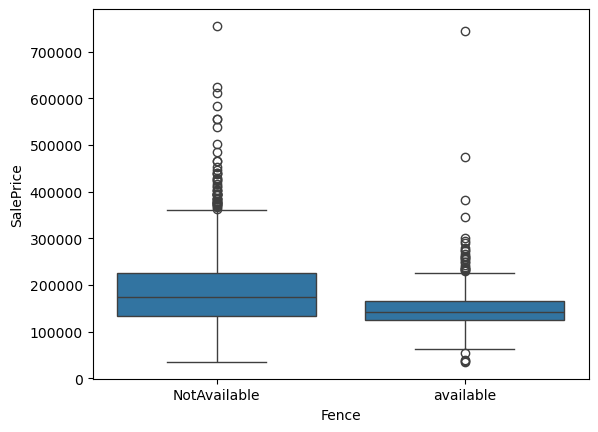

In [265]:
sns.boxplot(data=data,x='Fence',y='SalePrice')
plt.show()

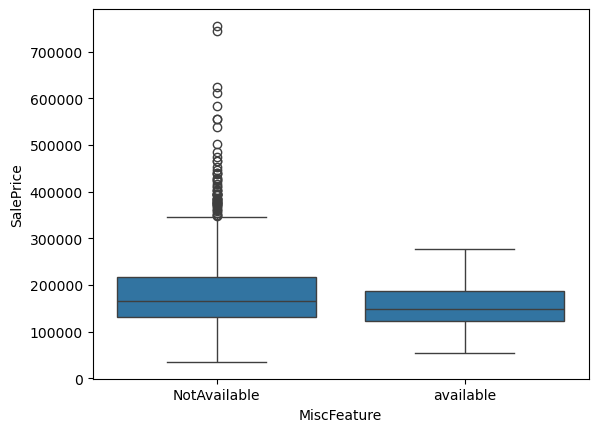

In [267]:
sns.boxplot(data=data,x='MiscFeature',y='SalePrice')
plt.show()

In [88]:
data.isnull().sum()

Id             0
OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

## Outlier Treatment

We need to identify the outliers 
* IQR method

UL= Q3 + 1.5*IQR

LL= Q1- 1.5*IQR

<LL or >UL --> Outlier
  
* Z- socre methood/ 3- sigma method (when data is approx normal data)
  
values <mu-3sigma and >mu+3sigma----> outlier

Standardization:

z-score= z= (x- mu)/ sigma


We need to treat missing values 
* Drop the outliers
* Cap the outliers

In [90]:
# Identify the outliers 

#IOR Method
q3, q1= data['GrLivArea'].quantile([0.75,0.25])
iqr= q3-q1
ul, ll= q3+1.5*iqr, q1-1.5*iqr

In [92]:
data[(data['GrLivArea']> ul)|(data['GrLivArea']<ll)]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
55,56,10,2006,1410,SBrkr,2945,3,BuiltIn,3,641,438780
107,108,7,1990,1673,SBrkr,3222,3,Attchd,3,594,320000
169,170,10,1892,1107,SBrkr,3608,2,Detchd,3,840,475000
179,180,8,1918,1360,SBrkr,3112,2,Detchd,2,795,235000
212,213,8,1995,1462,SBrkr,2794,2,Attchd,3,810,403000
285,286,7,1880,1470,SBrkr,3493,3,Attchd,3,870,295000
305,306,7,1967,710,SBrkr,2978,2,BuiltIn,2,564,242000
475,476,8,1992,3200,SBrkr,3228,3,Attchd,2,546,430000
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
583,584,8,1934,965,SBrkr,3194,2,Basment,2,380,359100


In [398]:
# Z- score / 3- sigma method

mu= data['GrLivArea'].mean()
sd= data['GrLivArea'].std()

ul,ll=  mu+3*sd, mu- 3*sd

data[(data['GrLivArea']>ul)|(data['GrLivArea']<ll)]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
107,108,7,1990,1673,SBrkr,3222,3,Attchd,3,594,320000
169,170,10,1892,1107,SBrkr,3608,2,Detchd,3,840,475000
179,180,8,1918,1360,SBrkr,3112,2,Detchd,2,795,235000
285,286,7,1880,1470,SBrkr,3493,3,Attchd,3,870,295000
475,476,8,1992,3200,SBrkr,3228,3,Attchd,2,546,430000
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
583,584,8,1934,965,SBrkr,3194,2,Basment,2,380,359100
610,611,6,1914,1440,FuseA,3395,2,NoGarage,0,0,200000
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
742,743,8,2003,1650,SBrkr,3279,3,BuiltIn,3,841,538000


In [400]:
#Another way for 3 sigma 
z_scores= (data['GrLivArea']-mu)/sd

ind= z_scores[(z_scores>3)|(z_scores<-3)].index

In [402]:
ind

Index([ 107,  169,  179,  285,  475,  500,  583,  610,  665,  742,  770, 1134,
       1147, 1231, 1260, 1314],
      dtype='int64')

In [404]:
data.iloc[ind,:]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
107,108,7,1990,1673,SBrkr,3222,3,Attchd,3,594,320000
169,170,10,1892,1107,SBrkr,3608,2,Detchd,3,840,475000
179,180,8,1918,1360,SBrkr,3112,2,Detchd,2,795,235000
285,286,7,1880,1470,SBrkr,3493,3,Attchd,3,870,295000
475,476,8,1992,3200,SBrkr,3228,3,Attchd,2,546,430000
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
583,584,8,1934,965,SBrkr,3194,2,Basment,2,380,359100
610,611,6,1914,1440,FuseA,3395,2,NoGarage,0,0,200000
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
742,743,8,2003,1650,SBrkr,3279,3,BuiltIn,3,841,538000


In [94]:
# Treating the outliers 

#Remove outliers using IQR method 

for i in num_cols: 
    q3, q1= data[i].quantile([0.75,0.25])
    iqr= q3-q1
    ul, ll= q3+1.5*iqr, q1-1.5*iqr
    data= data[~((data[i]>ul)|(data[i]<ll))]

In [96]:
data.shape

(1274, 11)

In [412]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125


In [414]:
# Remove outliers using Zscore/ 3sigma method 

for i in num_cols:
    mu=data['GrLivArea'].mean()
    sd=data['GrLivArea'].std()
    ul,ll=mu+3*sd,mu-3*sd
    data=data[~((data['GrLivArea']>ul)|(data['GrLivArea']<ll))]

In [416]:
data.shape

(1273, 11)

In [420]:
#Capping outliers using IQR method 

for i in num_cols: 
    q3, q1= data[i].quantile([0.75,0.25])
    iqr= q3-q1
    ul, ll= q3+1.5*iqr, q1-1.5*iqr
    data[i]= data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

In [424]:
data.shape

(1273, 11)

In [528]:
# Capping using 3sigma 

for i in num_cols:
    mu=data[i].mean()
    sd=data[i].std()
    ul,ll=mu+3*sd,mu-3*sd
    data= data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

KeyError: 'TotalBsmtSF'

## Treating duplicate values 

In [98]:
data[data.duplicated()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice


In [538]:
data.drop_duplicates()

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
781     1898
812     1904
1198    1911
1212    1917
1255    1892
Name: YearBuilt, Length: 105, dtype: int64

## Enxoding techniques 

In [100]:
#Dummy encoding
pd.get_dummies(data, columns= ['Electrical'], drop_first= True, dtype= 'int')

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,1,7,2003,856,1710,2,Attchd,2,548,208500,0,0,0,1
1,2,6,1976,1262,1262,2,Attchd,2,460,181500,0,0,0,1
2,3,7,2001,920,1786,2,Attchd,2,608,223500,0,0,0,1
3,4,7,1915,756,1717,1,Detchd,3,642,140000,0,0,0,1
4,5,8,2000,1145,2198,2,Attchd,3,836,250000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,1647,2,Attchd,2,460,175000,0,0,0,1
1414,1415,6,1978,1542,2073,2,Attchd,2,500,210000,0,0,0,1
1415,1416,7,1941,1152,2340,2,Attchd,1,252,266500,0,0,0,1
1416,1417,5,1950,1078,1078,1,Detchd,1,240,142125,0,0,0,0


In [102]:
# Use binning

data['Electrical']= np.where(data['Electrical']== 'SBrkr', data['Electrical'], 'Others')

In [104]:
data= pd.get_dummies(data, columns=['Electrical'], drop_first= True)

In [106]:
data['Electrical_SBrkr'].value_counts()

Electrical_SBrkr
True     1170
False     104
Name: count, dtype: int64

In [108]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Electrical_SBrkr
0,1,7,2003,856,1710,2,Attchd,2,548,208500,True
1,2,6,1976,1262,1262,2,Attchd,2,460,181500,True
2,3,7,2001,920,1786,2,Attchd,2,608,223500,True
3,4,7,1915,756,1717,1,Detchd,3,642,140000,True
4,5,8,2000,1145,2198,2,Attchd,3,836,250000,True
...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,1647,2,Attchd,2,460,175000,True
1414,1415,6,1978,1542,2073,2,Attchd,2,500,210000,True
1415,1416,7,1941,1152,2340,2,Attchd,1,252,266500,True
1416,1417,5,1950,1078,1078,1,Detchd,1,240,142125,False


In [578]:
# Leble encoding
le= LabelEncoder() #Instance

In [582]:
data['GarageType']=le.fit_transform(data['GarageType'])

In [584]:
data['GarageType'].value_counts()

GarageType
1    800
5    354
6    143
3     87
2     19
4      9
0      6
Name: count, dtype: int64

In [588]:
# Frequency encoding 
map_dict= data['GarageType'].value_counts(normalize= True).to_dict()


In [590]:
data['GarageType'].map(map_dict)

0       0.564175
1       0.564175
2       0.564175
3       0.249647
4       0.564175
          ...   
1413    0.564175
1414    0.564175
1415    0.564175
1416    0.100846
1417    0.564175
Name: GarageType, Length: 1418, dtype: float64

In [596]:
# target encoding 
map_dict= round(data.groupby(by= 'GarageType')['SalePrice'].mean()).to_dict()

In [598]:
data['GarageType'].map(map_dict)

0       208699.0
1       208699.0
2       208699.0
3       133621.0
4       208699.0
          ...   
1413    208699.0
1414    208699.0
1415    208699.0
1416    117131.0
1417    208699.0
Name: GarageType, Length: 1418, dtype: float64

In [600]:
# N-1 Dummy
data= pd.get_dummies(data, columns= ['GarageType'], drop_first= True)

In [602]:
# Original encoding 
map_dict= {'Available':1, 'NotAvailable':0}

data['Fence']= data['Fence'].map(map_dict)
data['MiscFeature']= data['MiscFeature'].map(map_dict)

In [604]:
data.head(3)

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Electrical_SBrkr,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6
0,1,7,2003,856,1710,2,2,548,NaN,NaN,208500,True,True,False,False,False,False,False
1,2,6,1976,1262,1262,2,2,460,NaN,NaN,181500,True,True,False,False,False,False,False
2,3,7,2001,920,1786,2,2,608,NaN,NaN,223500,True,True,False,False,False,False,False


In [114]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Electrical_SBrkr
0,1,7,2003,856,1710,2,Attchd,2,548,208500,True
1,2,6,1976,1262,1262,2,Attchd,2,460,181500,True
2,3,7,2001,920,1786,2,Attchd,2,608,223500,True
3,4,7,1915,756,1717,1,Detchd,3,642,140000,True
4,5,8,2000,1145,2198,2,Attchd,3,836,250000,True
...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,1647,2,Attchd,2,460,175000,True
1414,1415,6,1978,1542,2073,2,Attchd,2,500,210000,True
1415,1416,7,1941,1152,2340,2,Attchd,1,252,266500,True
1416,1417,5,1950,1078,1078,1,Detchd,1,240,142125,False


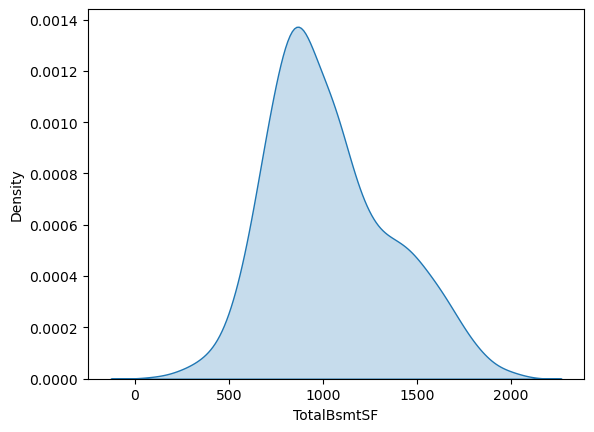

In [116]:
#Scale 
sns.kdeplot(data= data, x= 'TotalBsmtSF', fill= True)
plt.show()

In [142]:
scaler= RobustScaler()

scaler_data= scaler.fit_transform(data[['TotalBsmtSF']])

In [144]:
scaler_data

array([[-0.27160494],
       [ 0.63973064],
       [-0.12794613],
       ...,
       [ 0.39281706],
       [ 0.22671156],
       [ 0.62626263]])

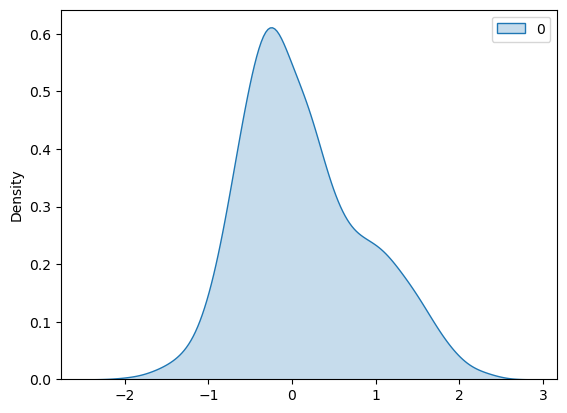

In [146]:
sns.kdeplot(scaler_data ,fill= True)
plt.show()

In [162]:
data[num_cols]

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,2003,856,1710,548,208500
1,1976,1262,1262,460,181500
2,2001,920,1786,608,223500
3,1915,756,1717,642,140000
4,2000,1145,2198,836,250000
...,...,...,...,...,...
1413,1999,953,1647,460,175000
1414,1978,1542,2073,500,210000
1415,1941,1152,2340,252,266500
1416,1950,1078,1078,240,142125


In [170]:
scale_cols= ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']

In [168]:
num_cols

['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

In [172]:
# Standard Scaler 

data_s= data.copy()
scaler= StandardScaler()
data_s[scale_cols]= scaler.fit_transform(data[scale_cols])

In [176]:
data_s

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Electrical_SBrkr
0,1,7,1.092136,-0.541221,0.632790,2,Attchd,2,0.497162,208500,True
1,2,6,0.172068,0.697620,-0.431357,2,Attchd,2,0.042367,181500,True
2,3,7,1.023983,-0.345936,0.813315,2,Attchd,2,0.807249,223500,True
3,4,7,-1.906604,-0.846355,0.649417,1,Detchd,3,0.982965,140000,True
4,5,8,0.989906,0.340614,1.791949,2,Attchd,3,1.985580,250000,True
...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,0.955830,-0.245242,0.483144,2,Attchd,2,0.042367,175000,True
1414,1415,6,0.240221,1.551994,1.495033,2,Attchd,2,0.249092,210000,True
1415,1416,7,-1.020612,0.361973,2.129246,2,Attchd,1,-1.032601,266500,True
1416,1417,5,-0.713923,0.136175,-0.868417,1,Detchd,1,-1.094619,142125,False


## Feature Transformation

In [181]:
x= data_s['GrLivArea']

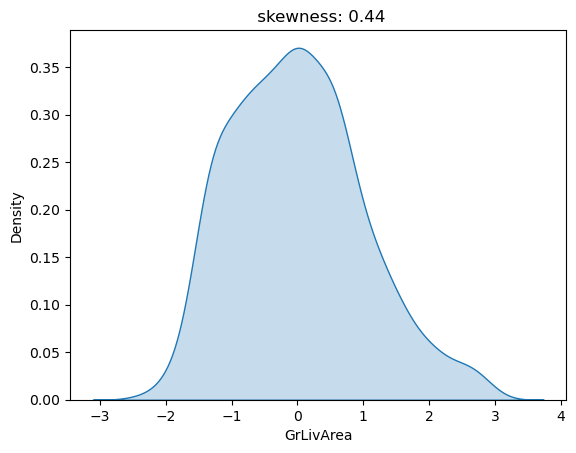

In [191]:
sns.kdeplot(x,fill= True)
plt.title(f' skewness: {round(x.skew(),2)}')
plt.show()

TotalBsmtSF
864     33
672     17
912     15
1040    14
816     12
        ..
1650     1
1838     1
1581     1
707      1
1542     1
Name: count, Length: 642, dtype: int64

In [199]:
# Perform Yeo- Johnson transform on the data 

scale_cols

['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']

In [208]:
pt= PowerTransformer()

In [210]:
data_s[scale_cols]= pt.fit_transform(data[scale_cols])